In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Data Cleaning/database.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
earthquakes.head(1000)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,07/23/1968,23:02:39,40.387,143.505,Earthquake,26.7,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM819294,ISCGEM,ISCGEM,ISCGEM,Automatic
996,07/25/1968,07:23:07,-30.725,-178.217,Earthquake,45.0,NaN,NaN,7.3,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM819340,ISCGEM,ISCGEM,ISCGEM,Automatic
997,07/25/1968,10:50:33,45.558,146.861,Earthquake,17.3,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM819351,ISCGEM,ISCGEM,ISCGEM,Automatic
998,07/27/1968,10:51:32,-19.188,176.024,Earthquake,15.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM819418,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
# get the number of missing data points per column
missing_values_count = earthquakes.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:15]

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
dtype: int64

In [4]:
# how many total missing values do we have?
total_cells = np.product(earthquakes.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

29.581695996355144


In [5]:
earthquakes_with_na_dropped = earthquakes.dropna(axis=1)
cols_in_original_dataset = earthquakes.shape[1]
cols_in_na_dropped = earthquakes_with_na_dropped.shape[1]
dropped_columns = cols_in_original_dataset - cols_in_na_dropped

In [6]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % earthquakes.shape[1])
print("Columns in na's dropped: %d" % earthquakes_with_na_dropped.shape[1])

Columns in original dataset: 21 

Columns in na's dropped: 12


In [7]:
earthquakes_with_na_dropped= earthquakes.fillna(0)
earthquakes_with_na_dropped.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,0.0,0.0,6.0,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,0.0,0.0,6.2,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [8]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [9]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [10]:
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

In [11]:
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

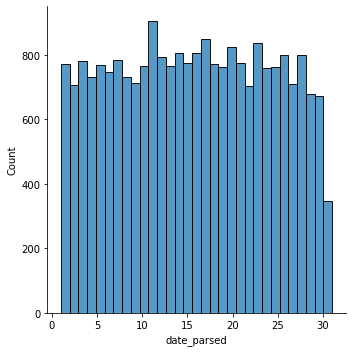

In [12]:
# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.displot(day_of_month_earthquakes, kde=False, bins=31)